In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("Train.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train_null = df.isnull().sum()
train_null

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [8]:
train_dtype= df.dtypes

In [9]:
df["Item_Identifier"].nunique()

1559

In [10]:
df_test = pd.read_csv("Test.csv")

In [11]:
test_null = df_test.isnull().sum()

In [12]:
pd.DataFrame([train_null,test_null],)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,1463.0,0.0,0.0,0.0,0.0,0.0,0.0,2410.0,0.0,0.0,0.0
1,0.0,976.0,0.0,0.0,0.0,0.0,0.0,0.0,1606.0,0.0,0.0,NaN


In [13]:
test_dtype = df_test.dtypes

In [14]:
pd.DataFrame([train_dtype,test_dtype],)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,object,float64,object,float64,object,float64,object,int64,object,object,object,float64
1,object,float64,object,float64,object,float64,object,int64,object,object,object,NaN


In [15]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
df["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [18]:
df_test["Outlet_Establishment_Year"].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

In [19]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [20]:
df["Outlet_Establishment_Year"]=df["Outlet_Establishment_Year"].apply(lambda x:(2009-x))

In [21]:
df["Outlet_Establishment_Year"].unique()

array([10,  0, 11, 22, 24,  7,  2, 12,  5], dtype=int64)

In [22]:
df_test["Outlet_Establishment_Year"] = df_test["Outlet_Establishment_Year"].apply(lambda x : (2009-x))

In [23]:
df_test["Outlet_Establishment_Year"].unique()

array([10,  2, 11, 24, 12,  0,  7, 22,  5], dtype=int64)

In [24]:
def func2(x):
    try:
        if np.isnan(x):
            return "other"
        else: 
            return x
    except:
        return x

In [25]:
df["Outlet_Size"]=df["Outlet_Size"].apply(func2)

In [26]:
df["Outlet_Size"].unique()

array(['Medium', 'other', 'High', 'Small'], dtype=object)

In [27]:
df_test["Outlet_Size"]=df_test["Outlet_Size"].apply(func2)

In [28]:
df_test["Outlet_Size"].unique()

array(['Medium', 'other', 'Small', 'High'], dtype=object)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

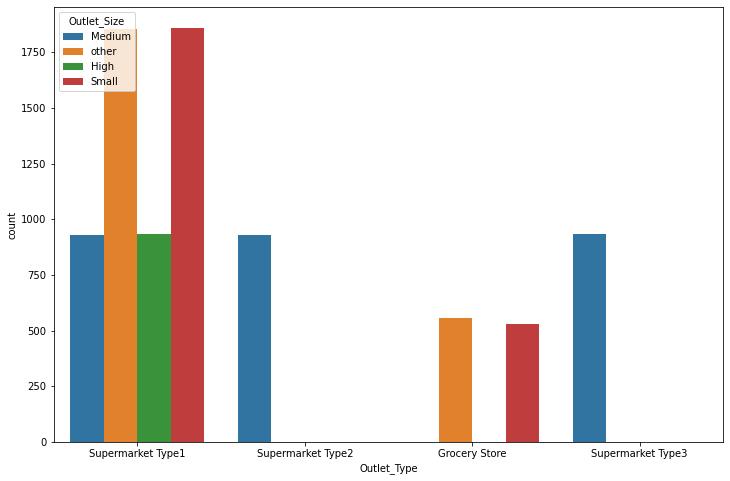

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(data = df,x ="Outlet_Type",hue="Outlet_Size" )

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

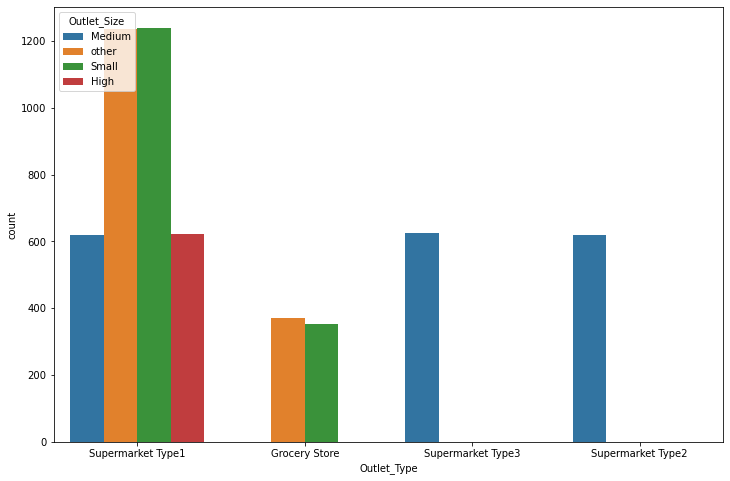

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(data = df_test,x ="Outlet_Type",hue="Outlet_Size" )

In [31]:
def func3(x1,x2):
    if x1=="Grocery Store":
        x2 = "Small"
        return x2  
    elif x1=="Supermarket Type1" and x2 == "other":
        x2 = "Small"
        return x2
    else:
        return x2

In [32]:
df["Outlet_Size"]=df.apply(lambda x: func3(x["Outlet_Type"], x["Outlet_Size"]), axis=1)

In [33]:
df_test["Outlet_Size"]=df_test.apply(lambda x: func3(x["Outlet_Type"], x["Outlet_Size"]), axis=1)

In [34]:
df["Outlet_Size"] = df["Outlet_Size"].map({"Small":1,"Medium":2,"High":3})

In [35]:
df_test["Outlet_Size"] = df_test["Outlet_Size"].map({"Small":1,"Medium":2,"High":3})

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

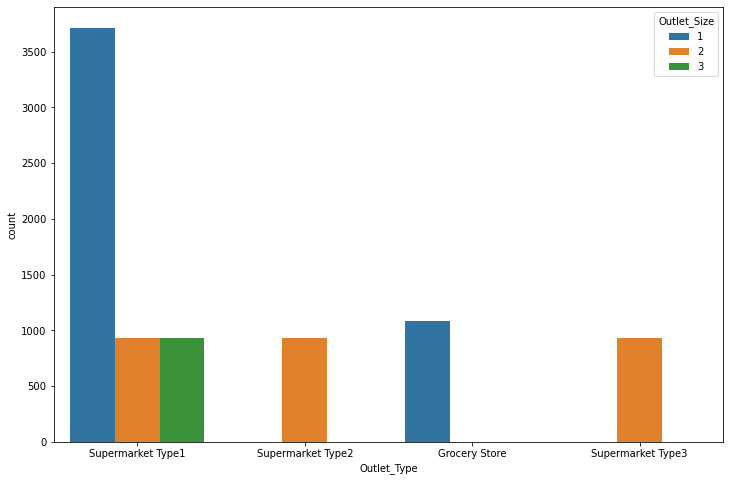

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(data = df,x ="Outlet_Type",hue="Outlet_Size" )

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

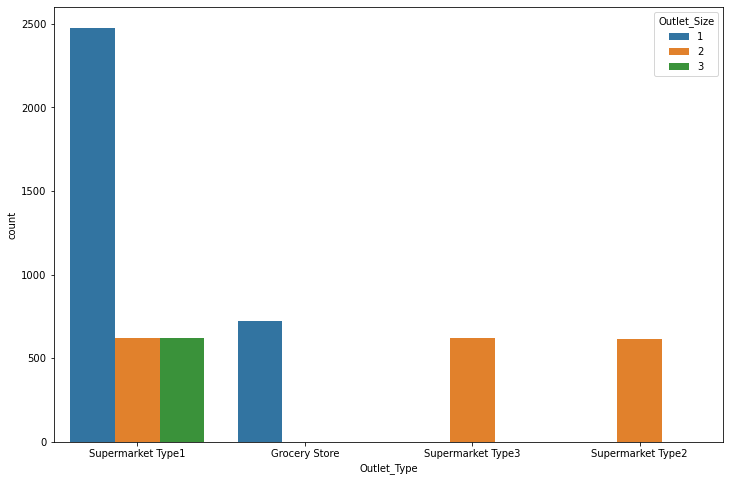

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(data = df_test,x ="Outlet_Type",hue="Outlet_Size" )

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,11,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,22,3,Tier 3,Supermarket Type1,994.7052


In [39]:
def fun4(df):
    df_new = pd.DataFrame()
    for i,sub_df in df.groupby("Item_Identifier"):
        m = sub_df["Item_Weight"].mean()
        sub_df.fillna(m,inplace=True)
        df_new = pd.concat([df_new,sub_df])
    return df_new
       

In [40]:
df=fun4(df)

In [41]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2,1,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,7,1,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,22,3,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,5,1,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,0,2,Tier 3,Supermarket Type2,850.8924
...,...,...,...,...,...,...,...,...,...,...,...,...
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,7,1,Tier 2,Supermarket Type1,2274.3728
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,12,1,Tier 1,Supermarket Type1,4711.2008
7166,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,24,1,Tier 1,Grocery Store,162.4552
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,0,2,Tier 3,Supermarket Type2,2599.2832


In [42]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
df = df.dropna()

In [44]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
df_test=fun4(df_test)

In [46]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
500,DRA12,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,12,1,Tier 1,Supermarket Type1
3912,DRA12,11.60,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,24,2,Tier 3,Supermarket Type3
5081,DRA12,11.60,LF,0.041010,Soft Drinks,141.0154,OUT049,10,2,Tier 1,Supermarket Type1
1211,DRA24,19.35,Regular,0.040009,Soft Drinks,163.2868,OUT045,7,1,Tier 2,Supermarket Type1
2847,DRA24,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,0,2,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...,...,...,...,...
2318,NCZ53,9.60,Low Fat,0.024616,Health and Hygiene,190.0214,OUT017,2,1,Tier 2,Supermarket Type1
2875,NCZ53,9.60,Low Fat,0.024527,Health and Hygiene,188.5214,OUT045,7,1,Tier 2,Supermarket Type1
2907,NCZ54,14.65,Low Fat,0.083344,Household,163.6552,OUT035,5,1,Tier 2,Supermarket Type1
4307,NCZ54,14.65,Low Fat,0.083290,Household,160.4552,OUT013,22,3,Tier 3,Supermarket Type1


In [47]:
df_test.isnull().sum()

Item_Identifier               0
Item_Weight                  20
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64

In [48]:
df_test = df_test.dropna()

In [49]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2,1,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,7,1,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,22,3,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,5,1,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,0,2,Tier 3,Supermarket Type2,850.8924


In [51]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'LF', 'Regular', 'reg', 'low fat'], dtype=object)

In [52]:
def fun5(x):
    if x=="Low Fat" or x=="LF":
        return "low fat"
    elif x == "Regular" or x == "reg":
        return "regular"
    else:
        return x
        

In [53]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].apply(fun5)

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\2991408584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Fat_Content"] = df["Item_Fat_Content"].apply(fun5)


In [54]:
df["Item_Fat_Content"].unique()

array(['low fat', 'regular'], dtype=object)

In [55]:
df_test["Item_Fat_Content"].unique()

array(['Low Fat', 'LF', 'Regular', 'reg', 'low fat'], dtype=object)

In [56]:
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].apply(fun5)

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\2569683422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].apply(fun5)


In [57]:
df_test["Item_Fat_Content"].unique()

array(['low fat', 'regular'], dtype=object)

In [58]:
df["Item_Identifier"] = df["Item_Identifier"].apply(lambda x:x[:2])

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\1141448354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Identifier"] = df["Item_Identifier"].apply(lambda x:x[:2])


In [59]:
df["Item_Identifier"] = df["Item_Identifier"].replace({"DR":"Drink","NC":"Non_consumable","FD":"Food"})

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\2591777330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Identifier"] = df["Item_Identifier"].replace({"DR":"Drink","NC":"Non_consumable","FD":"Food"})


In [60]:
df["Item_Identifier"].unique()

array(['Drink', 'Food', 'Non_consumable'], dtype=object)

In [61]:
df_test["Item_Identifier"] = df_test["Item_Identifier"].apply(lambda x:x[:2])

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\1720349124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Item_Identifier"] = df_test["Item_Identifier"].apply(lambda x:x[:2])


In [62]:
df_test["Item_Identifier"] = df_test["Item_Identifier"].replace({"DR":"Drink","NC":"Non_consumable","FD":"Food"})

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\2415236101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Item_Identifier"] = df_test["Item_Identifier"].replace({"DR":"Drink","NC":"Non_consumable","FD":"Food"})


In [63]:
df_test["Item_Identifier"].unique()

array(['Drink', 'Food', 'Non_consumable'], dtype=object)

In [64]:
df["Item_Visibility"].mean()

0.06611236082486217

In [65]:
df["Item_Visibility"] = df["Item_Visibility"].replace(0,df["Item_Visibility"].mean())

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\4174461339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Visibility"] = df["Item_Visibility"].replace(0,df["Item_Visibility"].mean())


In [66]:
df_test["Item_Visibility"] = df_test["Item_Visibility"].replace(0,df_test["Item_Visibility"].mean())

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\203038496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Item_Visibility"] = df_test["Item_Visibility"].replace(0,df_test["Item_Visibility"].mean())


In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,Drink,11.6,low fat,0.041178,Soft Drinks,140.3154,OUT017,2,1,Tier 2,Supermarket Type1,2552.6772
1197,Drink,11.6,low fat,0.066112,Soft Drinks,141.6154,OUT045,7,1,Tier 2,Supermarket Type1,3829.0158
1245,Drink,11.6,low fat,0.040912,Soft Drinks,142.3154,OUT013,22,3,Tier 3,Supermarket Type1,2552.6772
1693,Drink,11.6,low fat,0.066112,Soft Drinks,141.9154,OUT035,5,1,Tier 2,Supermarket Type1,992.7078
7467,Drink,11.6,low fat,0.041113,Soft Drinks,142.0154,OUT018,0,2,Tier 3,Supermarket Type2,850.8924


In [68]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
Item_Weight,1.000000,-0.017483,0.025975,0.013426,0.012425,0.013168
Item_Visibility,-0.017483,1.000000,-0.005115,0.077878,-0.097407,-0.133788
Item_MRP,0.025975,-0.005115,1.000000,-0.004599,-0.000743,0.567803
Outlet_Establishment_Year,0.013426,0.077878,-0.004599,1.000000,0.425604,0.049083
Outlet_Size,0.012425,-0.097407,-0.000743,0.425604,1.000000,0.162563
Item_Outlet_Sales,0.013168,-0.133788,0.567803,0.049083,0.162563,1.000000


In [69]:
def func6(x1,x2):
    if x1 == "Non_consumable":
        x2 = "Non_Edible"
        return x2
    else:
        return x2

In [70]:
df["Item_Fat_Content"]=df.apply(lambda x: func6(x["Item_Identifier"], x["Item_Fat_Content"]), axis=1)

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\94758895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Fat_Content"]=df.apply(lambda x: func6(x["Item_Identifier"], x["Item_Fat_Content"]), axis=1)


In [71]:
df["Item_Fat_Content"].unique()

array(['low fat', 'regular', 'Non_Edible'], dtype=object)

In [72]:
df_test["Item_Fat_Content"]=df_test.apply(lambda x: func6(x["Item_Identifier"], x["Item_Fat_Content"]), axis=1)

C:\Users\41779\AppData\Local\Temp\ipykernel_10980\2747851775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Item_Fat_Content"]=df_test.apply(lambda x: func6(x["Item_Identifier"], x["Item_Fat_Content"]), axis=1)


In [73]:
df_test["Item_Fat_Content"].unique()

array(['low fat', 'regular', 'Non_Edible'], dtype=object)

In [74]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,Drink,11.6,low fat,0.041178,Soft Drinks,140.3154,OUT017,2,1,Tier 2,Supermarket Type1,2552.6772
1197,Drink,11.6,low fat,0.066112,Soft Drinks,141.6154,OUT045,7,1,Tier 2,Supermarket Type1,3829.0158
1245,Drink,11.6,low fat,0.040912,Soft Drinks,142.3154,OUT013,22,3,Tier 3,Supermarket Type1,2552.6772
1693,Drink,11.6,low fat,0.066112,Soft Drinks,141.9154,OUT035,5,1,Tier 2,Supermarket Type1,992.7078
7467,Drink,11.6,low fat,0.041113,Soft Drinks,142.0154,OUT018,0,2,Tier 3,Supermarket Type2,850.8924


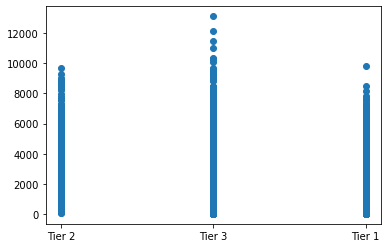

In [75]:
plt.scatter("Outlet_Location_Type","Item_Outlet_Sales",data=df)

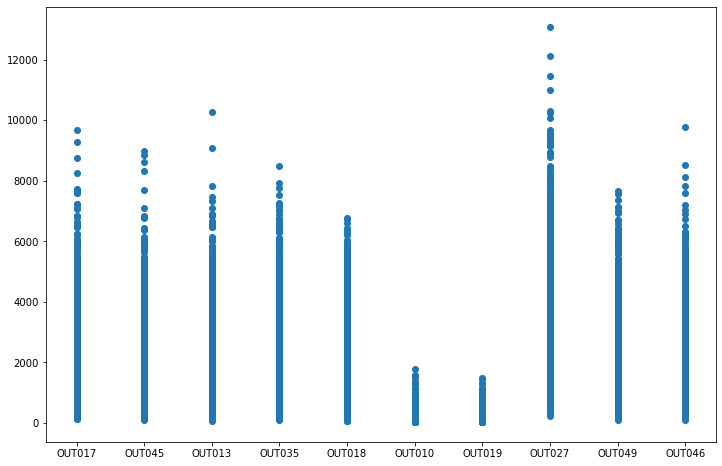

In [76]:
plt.figure(figsize=(12,8))
plt.scatter("Outlet_Identifier","Item_Outlet_Sales",data=df)

C:\Users\41779\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

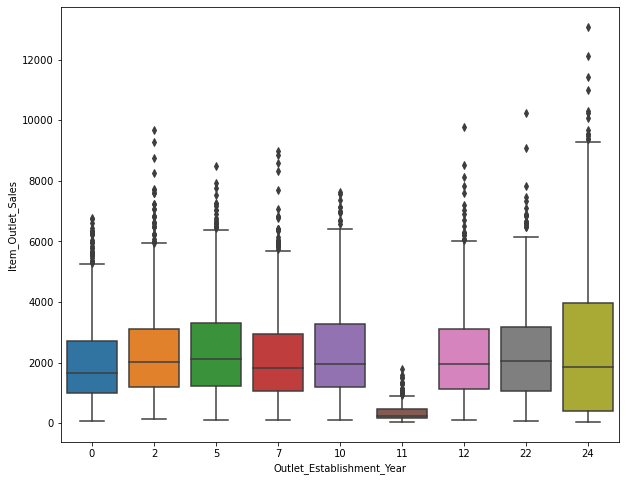

In [77]:
plt.figure(figsize=(10,8))
sns.boxplot("Outlet_Establishment_Year","Item_Outlet_Sales",data=df)

C:\Users\41779\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

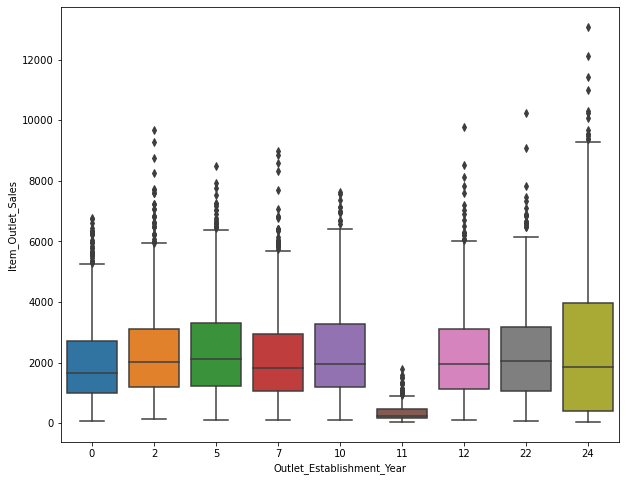

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot("Outlet_Establishment_Year","Item_Outlet_Sales",data=df)

In [79]:
df= df.drop("Outlet_Establishment_Year",axis=1)

In [80]:
df_test = df_test.drop("Outlet_Establishment_Year",axis=1)

In [81]:
df.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size               int64
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [82]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
500,Drink,11.60,low fat,0.040946,Soft Drinks,142.9154,OUT046,1,Tier 1,Supermarket Type1
3912,Drink,11.60,low fat,0.040748,Soft Drinks,140.0154,OUT027,2,Tier 3,Supermarket Type3
5081,Drink,11.60,low fat,0.041010,Soft Drinks,141.0154,OUT049,2,Tier 1,Supermarket Type1
1211,Drink,19.35,regular,0.040009,Soft Drinks,163.2868,OUT045,1,Tier 2,Supermarket Type1
2847,Drink,19.35,regular,0.040091,Soft Drinks,163.6868,OUT018,2,Tier 3,Supermarket Type2


In [83]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

C:\Users\41779\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

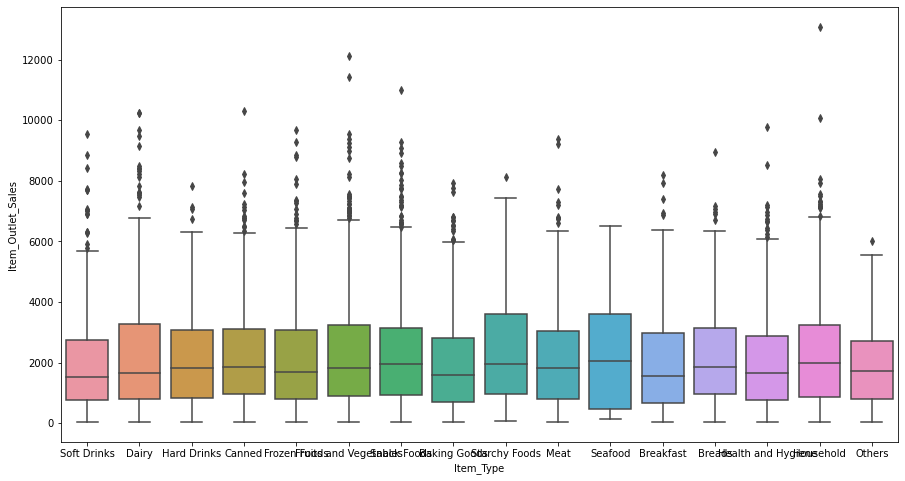

In [84]:
plt.figure(figsize=(15,8))
sns.boxplot("Item_Type","Item_Outlet_Sales",data=df)

In [85]:
item_count = df["Item_Type"].value_counts()

In [86]:
item_less_25 = item_count[item_count<=251]

In [87]:
item_less_25

Breads           251
Hard Drinks      214
Others           169
Starchy Foods    148
Breakfast        110
Seafood           64
Name: Item_Type, dtype: int64

In [88]:
def item_seperation(x):
    if x in item_less_25:
        return "others"
    else:
        return x

In [89]:
df["Item_Type"] = df["Item_Type"].apply(item_seperation)

C:\Users\41779\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

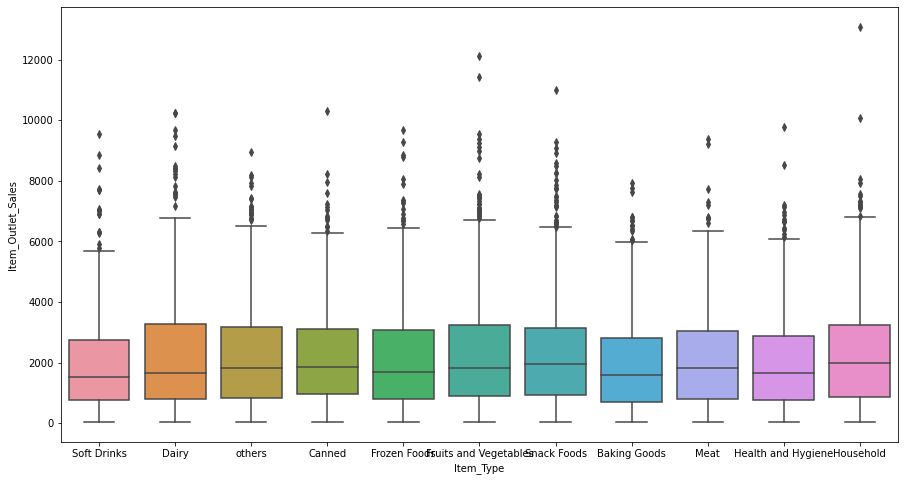

In [90]:
plt.figure(figsize=(15,8))
sns.boxplot("Item_Type","Item_Outlet_Sales",data=df)

C:\Users\41779\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

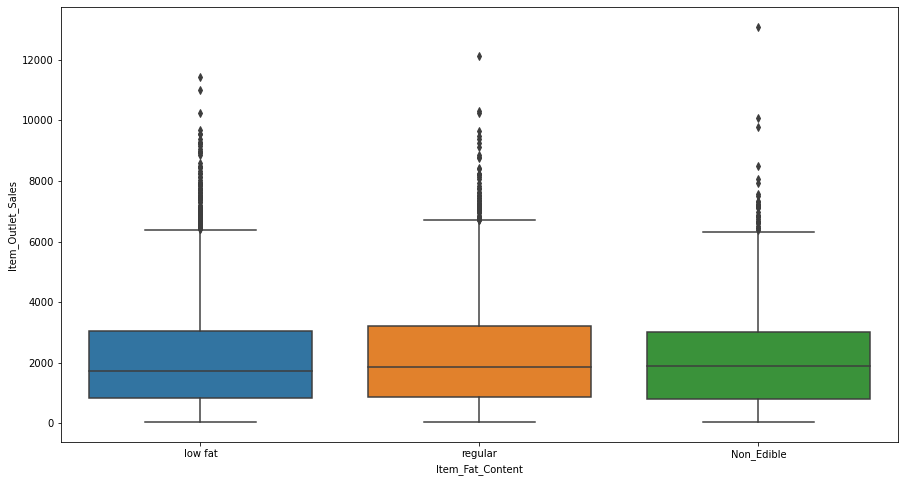

In [91]:
plt.figure(figsize=(15,8))
sns.boxplot("Item_Fat_Content","Item_Outlet_Sales",data=df)

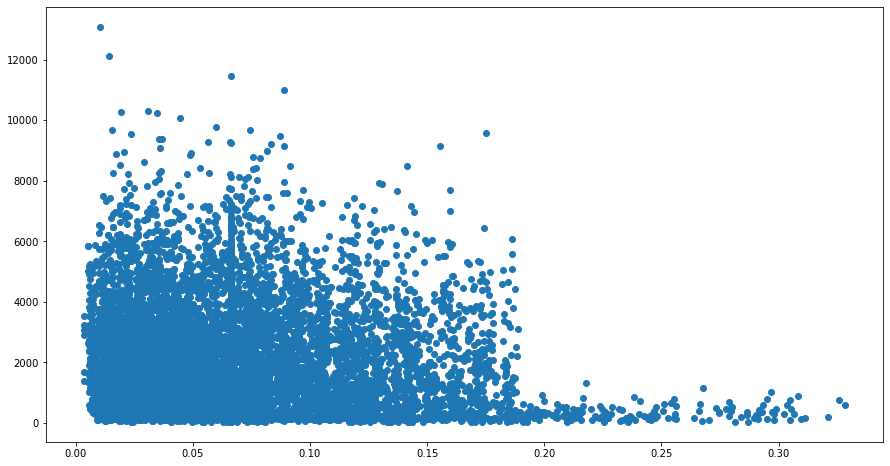

In [92]:
plt.figure(figsize=(15,8))
plt.scatter("Item_Visibility","Item_Outlet_Sales",data=df)


In [93]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
others                    956
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: Item_Type, dtype: int64

In [94]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,Drink,11.6,low fat,0.041178,Soft Drinks,140.3154,OUT017,1,Tier 2,Supermarket Type1,2552.6772
1197,Drink,11.6,low fat,0.066112,Soft Drinks,141.6154,OUT045,1,Tier 2,Supermarket Type1,3829.0158
1245,Drink,11.6,low fat,0.040912,Soft Drinks,142.3154,OUT013,3,Tier 3,Supermarket Type1,2552.6772
1693,Drink,11.6,low fat,0.066112,Soft Drinks,141.9154,OUT035,1,Tier 2,Supermarket Type1,992.7078
7467,Drink,11.6,low fat,0.041113,Soft Drinks,142.0154,OUT018,2,Tier 3,Supermarket Type2,850.8924


In [95]:
df_test["Item_Type"].unique()

array(['Soft Drinks', 'Dairy', 'Hard Drinks', 'Canned',
       'Fruits and Vegetables', 'Snack Foods', 'Baking Goods',
       'Frozen Foods', 'Starchy Foods', 'Meat', 'Seafood', 'Breakfast',
       'Breads', 'Health and Hygiene', 'Household', 'Others'],
      dtype=object)

In [96]:
df_test["Item_Type"] = df_test["Item_Type"].apply(item_seperation)

In [97]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

In [98]:
df_dmy_idntfr = pd.get_dummies(df["Item_Identifier"])
df_dmy_fat = pd.get_dummies(df["Item_Fat_Content"])
df_dmy_item_type = pd.get_dummies(df["Item_Type"])

df_dmy_outlc = pd.get_dummies(df["Outlet_Location_Type"])
df_dmy_outyp = pd.get_dummies(df["Outlet_Type"])
df_dmy_outfier = pd.get_dummies(df["Outlet_Identifier"])

In [99]:
df = pd.concat([df,df_dmy_fat,df_dmy_idntfr,df_dmy_item_type,df_dmy_outlc,df_dmy_outyp,df_dmy_outfier],axis=1)

In [100]:
df = df.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],axis=1)

In [101]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Non_Edible,low fat,regular,Drink,Food,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
118,11.60,0.041178,140.3154,1,7.845290,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1197,11.60,0.066112,141.6154,1,8.250624,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1245,11.60,0.040912,142.3154,3,7.845290,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1693,11.60,0.066112,141.9154,1,6.901443,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7467,11.60,0.041113,142.0154,2,6.747460,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,14.65,0.083528,162.4552,1,7.729899,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2839,14.65,0.083359,161.9552,1,8.457910,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7166,14.65,0.145952,160.9552,1,5.096539,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7738,14.65,0.083699,163.4552,2,7.863376,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [102]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [103]:
test_dmy_idntfr = pd.get_dummies(df_test["Item_Identifier"])
test_dmy_fat = pd.get_dummies(df_test["Item_Fat_Content"])
test_dmy_item_type = pd.get_dummies(df_test["Item_Type"])
test_dmy_outlc = pd.get_dummies(df_test["Outlet_Location_Type"])
test_dmy_outyp = pd.get_dummies(df_test["Outlet_Type"])
test_dmy_outfier = pd.get_dummies(df_test["Outlet_Identifier"])

In [104]:
df_test = pd.concat([df_test,test_dmy_fat,test_dmy_idntfr,test_dmy_item_type,test_dmy_outlc,test_dmy_outyp,test_dmy_outfier],axis=1)

In [105]:
df_test = df_test.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],axis=1)

In [106]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Item_Outlet_Sales', 'Non_Edible', 'low fat', 'regular', 'Drink',
       'Food', 'Non_consumable', 'Baking Goods', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Health and Hygiene',
       'Household', 'Meat', 'Snack Foods', 'Soft Drinks', 'others', 'Tier 1',
       'Tier 2', 'Tier 3', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3', 'OUT010', 'OUT013', 'OUT017',
       'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'],
      dtype='object')

In [107]:
df_test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Non_Edible', 'low fat', 'regular', 'Drink', 'Food', 'Non_consumable',
       'Baking Goods', 'Canned', 'Dairy', 'Frozen Foods',
       'Fruits and Vegetables', 'Health and Hygiene', 'Household', 'Meat',
       'Snack Foods', 'Soft Drinks', 'others', 'Tier 1', 'Tier 2', 'Tier 3',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3', 'OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019',
       'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'],
      dtype='object')

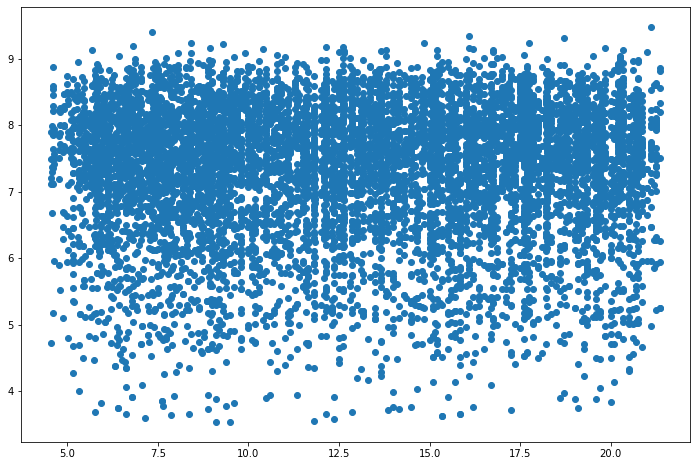

In [108]:
plt.figure(figsize=(12,8))
plt.scatter("Item_Weight","Item_Outlet_Sales",data=df)

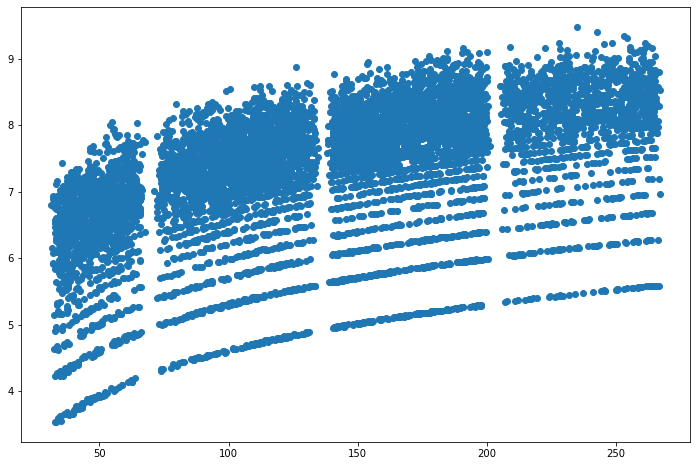

In [109]:
plt.figure(figsize=(12,8))
plt.scatter("Item_MRP","Item_Outlet_Sales",data=df)

In [110]:
len(df)

8519

In [111]:
len(df_test)

5661

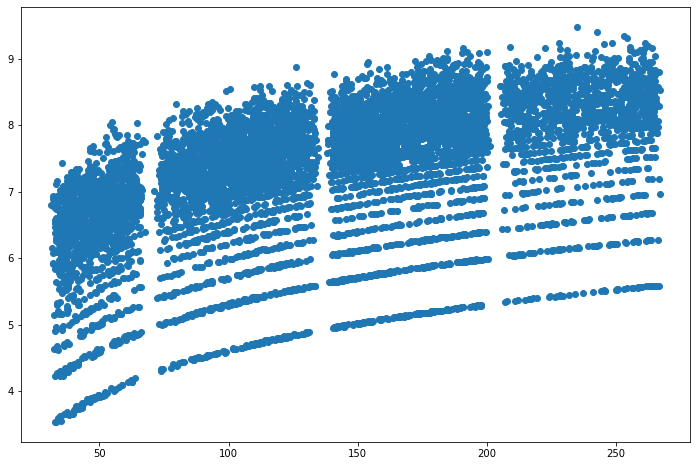

In [112]:
plt.figure(figsize=(12,8))
plt.scatter("Item_MRP","Item_Outlet_Sales",data=df)

In [113]:
X = df.drop("Item_Outlet_Sales",axis=1)
y = df[["Item_Outlet_Sales"]]

In [114]:
from sklearn.model_selection import train_test_split


In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [116]:
X_train.shape

(5963, 38)

In [117]:
y_train.shape

(5963, 1)

In [118]:
X_test.shape

(2556, 38)

In [119]:
y_test.shape

(2556, 1)

In [120]:
from sklearn.linear_model import LinearRegression


In [121]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [122]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [[ 1.07175416e-04 -8.67217635e-02  8.43048047e-03  2.37645130e-01
  -7.67704125e-03 -7.52097622e-03  1.51980175e-02 -9.10175252e-03
   1.67787938e-02 -7.67704125e-03 -1.91746320e-03  3.52249118e-02
  -7.82794390e-02 -4.29080705e-02 -3.64411856e-03  5.07979319e-02
   4.88153403e-03  7.82937405e-03 -4.00711002e-03  1.94283551e-02
   1.25940944e-02 -7.14262578e-02  1.63905972e-01 -9.24797140e-02
  -8.80075156e-01  3.25026585e-01  1.01869302e-01  4.53179269e-01
  -4.50161099e-01 -1.97367186e-01  6.35364894e-02  1.01869302e-01
  -4.29914057e-01  4.53179269e-01  9.30338615e-02  7.33562091e-03
   2.81156868e-01  7.73309307e-02]]


In [123]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

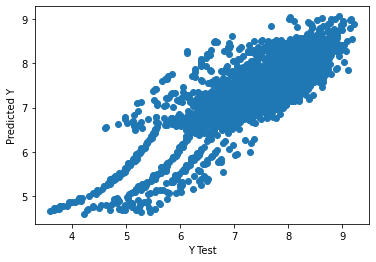

In [124]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [125]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.41400918432174655
MSE: 0.2850914169402831
RMSE: 0.5339395255459958


In [126]:
model.score(X_train,y_train)

0.7189659578726153

In [127]:
model.score(X_test,y_test)

0.7248806259929758

In [128]:
model.predict(df_test)

array([[7.51673771],
       [8.00907327],
       [7.53453347],
       ...,
       [7.72216531],
       [7.62369595],
       [7.67407863]])

In [129]:
X.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Non_Edible', 'low fat', 'regular', 'Drink', 'Food', 'Non_consumable',
       'Baking Goods', 'Canned', 'Dairy', 'Frozen Foods',
       'Fruits and Vegetables', 'Health and Hygiene', 'Household', 'Meat',
       'Snack Foods', 'Soft Drinks', 'others', 'Tier 1', 'Tier 2', 'Tier 3',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3', 'OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019',
       'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'],
      dtype='object')

In [130]:
def sales_pred(wgt,vis,mrp,out_sz,fat_con,itm_idntfr,itm_typ,loc_typ,out_typ,out_idf):
    input = np.zeros(len(X.columns))
    print(input)
    input[0]=wgt
    input[1]=vis
    input[2]=mrp
    input[3]=out_sz
    
    locf=np.where(X.columns == fat_con)
    locidnfr=np.where(X.columns == itm_idntfr)
    locityp=np.where(X.columns == itm_typ)
    loctyp=np.where(X.columns == loc_typ)
    loco=np.where(X.columns == out_typ)
    locidf=np.where(X.columns == out_idf)
    
    input[locf]=1
    input[locidnfr]=1
    input[locityp]=1
    input[loctyp]=1
    input[loco]=1
    input[locidf]=1
    
    return model.predict([input])

In [131]:
X_train.loc[61]

Item_Weight               7.970000
Item_Visibility           0.040071
Item_MRP                 87.351400
Outlet_Size               1.000000
Non_Edible                0.000000
low fat                   0.000000
regular                   1.000000
Drink                     0.000000
Food                      1.000000
Non_consumable            0.000000
Baking Goods              0.000000
Canned                    0.000000
Dairy                     0.000000
Frozen Foods              0.000000
Fruits and Vegetables     0.000000
Health and Hygiene        0.000000
Household                 0.000000
Meat                      1.000000
Snack Foods               0.000000
Soft Drinks               0.000000
others                    0.000000
Tier 1                    0.000000
Tier 2                    1.000000
Tier 3                    0.000000
Grocery Store             0.000000
Supermarket Type1         1.000000
Supermarket Type2         0.000000
Supermarket Type3         0.000000
OUT010              

In [131]:
sales_pred(7.97,0.04,87.35,1,"regular","Food","Meat","Tier 2","Supermarket Type1","OUT045")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([[7.04649921]])

In [135]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [136]:
importances

,Attribute,Importance
33,OUT027,0.453179
27,Supermarket Type3,0.453179
25,Supermarket Type1,0.325027
36,OUT046,0.281157
3,Outlet_Size,0.237645
22,Tier 2,0.163906
26,Supermarket Type2,0.101869
31,OUT018,0.101869
34,OUT035,0.093034
37,OUT049,0.077331


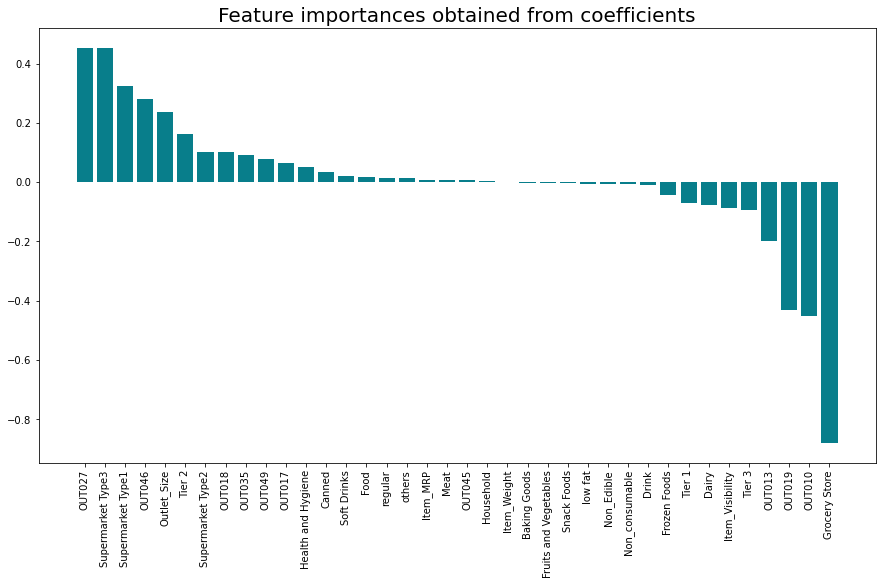

In [141]:
plt.figure(figsize=(15,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [132]:
import pickle

In [133]:
with open('big_mart.pickle','wb') as f:
    pickle.dump(model,f)

In [134]:
import json

In [135]:
cols = {"features":[col.lower() for col in X.columns]}

with open('big_mart_column.json','w') as k:
    k.write(json.dumps(cols))

In [136]:
cols

{'features': ['item_weight',
  'item_visibility',
  'item_mrp',
  'outlet_size',
  'non_edible',
  'low fat',
  'regular',
  'drink',
  'food',
  'non_consumable',
  'baking goods',
  'canned',
  'dairy',
  'frozen foods',
  'fruits and vegetables',
  'health and hygiene',
  'household',
  'meat',
  'snack foods',
  'soft drinks',
  'others',
  'tier 1',
  'tier 2',
  'tier 3',
  'grocery store',
  'supermarket type1',
  'supermarket type2',
  'supermarket type3',
  'out010',
  'out013',
  'out017',
  'out018',
  'out019',
  'out027',
  'out035',
  'out045',
  'out046',
  'out049']}